In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df =pd.read_csv('synthetic_dataset_rules.csv')
print(df)

     Feature1  Feature2  Feature3  Feature4  Label
0    0.374540  0.950714  0.731994  0.598658      4
1    0.156019  0.155995  0.058084  0.866176      0
2    0.601115  0.708073  0.020584  0.969910      3
3    0.832443  0.212339  0.181825  0.183405      4
4    0.304242  0.524756  0.431945  0.291229      2
..        ...       ...       ...       ...    ...
495  0.186101  0.802643  0.458187  0.482969      4
496  0.133480  0.080602  0.727939  0.496461      0
497  0.436851  0.729508  0.765513  0.158908      4
498  0.610225  0.135354  0.751375  0.656955      4
499  0.956615  0.068958  0.057055  0.282187      4

[500 rows x 5 columns]


In [3]:
features = ['Feature1','Feature2','Feature3','Feature4']
X = df[features]
Y = df['Label'].values.reshape(-1,1)

In [4]:
class NeuralNetwork(object):
    def __init__(self):
        inputLayerNeurons = 4
        hiddenLayer1Neurons = 10
        hiddenLayer2Neurons = 8
        outLayerNeurons = 1

        self.learning_rate = 0.2
        self.W_HI = np.random.randn(inputLayerNeurons, hiddenLayer1Neurons)
        self.W_HI1 = np.random.randn(hiddenLayer1Neurons, hiddenLayer2Neurons)
        self.W_OH = np.random.randn(hiddenLayer2Neurons, outLayerNeurons)

    def sigmoid(self, x, der=False):
        if der:
            return x * (1 - x)
        else:
            return 1 / (1 + np.exp(-x))

    def feedForward(self, X):
        self.input = X
        self.hidden_input = np.dot(X, self.W_HI)
        self.hidden_output = self.sigmoid(self.hidden_input)

        self.hidden_input1 = np.dot(self.hidden_output, self.W_HI1)
        self.hidden_output1 = self.sigmoid(self.hidden_input1)

        self.output_input = np.dot(self.hidden_output1, self.W_OH)
        self.pred = self.sigmoid(self.output_input)
        return self.pred

    def backPropagation(self, Y):
        # Output layer error
        output_error = Y - self.pred
        output_delta = output_error * self.sigmoid(self.pred, der=True)

        # Hidden Layer 2 error
        hidden_error1 = output_delta.dot(self.W_OH.T)
        hidden_delta1 = hidden_error1 * self.sigmoid(self.hidden_output1, der=True)

        # Hidden Layer 1 error
        hidden_error0 = hidden_delta1.dot(self.W_HI1.T)
        hidden_delta0 = hidden_error0 * self.sigmoid(self.hidden_output, der=True)

        # Update weights
        self.W_OH += self.hidden_output1.T.dot(output_delta) * self.learning_rate
        self.W_HI1 += self.hidden_output.T.dot(hidden_delta1) * self.learning_rate
        self.W_HI += self.input.T.dot(hidden_delta0) * self.learning_rate

    def train(self, X, Y):
        self.feedForward(X)
        self.backPropagation(Y)


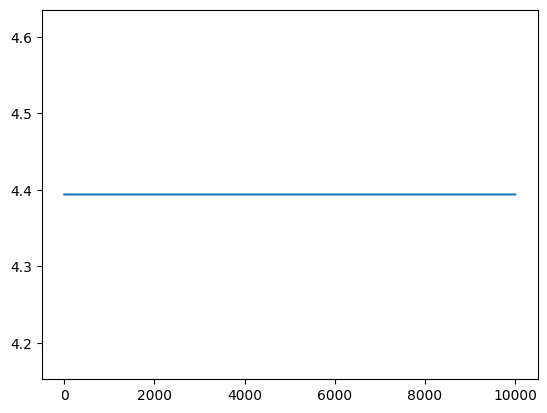

In [5]:
NN = NeuralNetwork()
err = []

for i in range(10000):
    NN.train(X, Y)
    err.append(np.mean(np.square(Y - NN.feedForward(X))))

plt.plot(err)

# New Section